**Credit Card Fraud Detection**

Objective:

To build a machine learning model that can effectively classify credit card transactions as fraudulent or genuine, minimizing both false positives and false negatives.



About Dataset:

The dataset consists of credit card transactions from European cardholders in September 2013. It is highly imbalanced, with frauds accounting for just 0.172% of the data. The dataset contains numerical features derived from a PCA transformation (V1 to V28), along with two untransformed features: 'Time' (time elapsed since the first transaction) and 'Amount' (transaction amount). The target variable 'Class' indicates fraud (1) or non-fraud (0).

In [64]:
#Importing Necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score


**Importing Dataset**

In [65]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**Exploratory Data Analysis**

In [66]:
#Shape of Dataset
df.shape

(19898, 31)

In [67]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

In [68]:
#Null Value check
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


There is 1 Null value present in each of the columns from V11-V28, Amount and Class.

In [69]:
#Dropping the Null values
df.dropna(inplace=True)
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [70]:
#Statistical Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,19897.0,15491.655425,10511.782804,0.000000,4536.000000,14786.000000,26219.000000,30633.000000
V1,19897.0,-0.244207,1.889960,-30.552380,-0.959586,-0.302521,1.164481,1.960497
V2,19897.0,0.242308,1.527298,-40.978852,-0.329083,0.220078,0.869867,16.713389
V3,19897.0,0.745773,1.767771,-31.103685,0.309231,0.898773,1.532937,4.101716
V4,19897.0,0.277023,1.466254,-5.172595,-0.636898,0.224612,1.142174,11.927512
V5,19897.0,-0.163240,1.430853,-32.092129,-0.745173,-0.199366,0.341371,34.099309
V6,19897.0,0.092847,1.331054,-23.496714,-0.657314,-0.175502,0.486727,21.393069
V7,19897.0,-0.145205,1.338252,-26.548144,-0.599383,-0.072229,0.448607,34.303177
V8,19897.0,0.022621,1.345757,-41.484823,-0.171775,0.023837,0.279976,20.007208
V9,19897.0,0.636344,1.278860,-7.175097,-0.209566,0.620152,1.409172,10.392889


Insight:

* The Amount feature ranges from 0 to 25,691.16, with a mean of approximately 88.35 and a standard deviation of 250.12.
* The dataset contains 31 columns, including V1 to V28 (likely principal components), Amount, and the target variable Class.

**Data Visualizations**

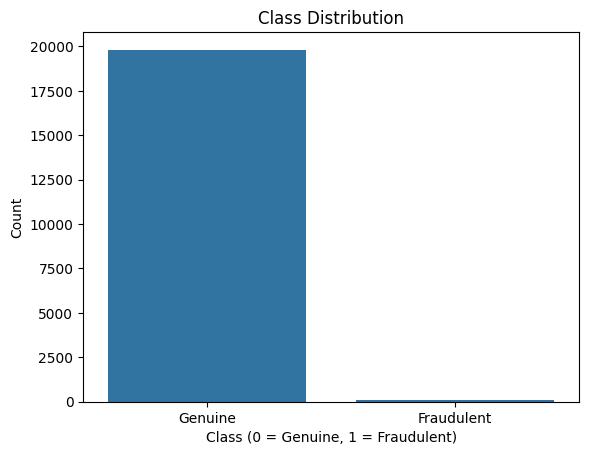

In [72]:
# Class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.xlabel("Class (0 = Genuine, 1 = Fraudulent)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Genuine', 'Fraudulent'])
plt.show()

In [71]:
df.Class.value_counts()

,count
Class,
0.0,19812
1.0,85


Insight:

The dataset is highly imbalanced, with a significant majority of transactions being genuine (Class 0) and a tiny fraction being fraudulent (Class 1). This confirms the need for handling class imbalance during model training.

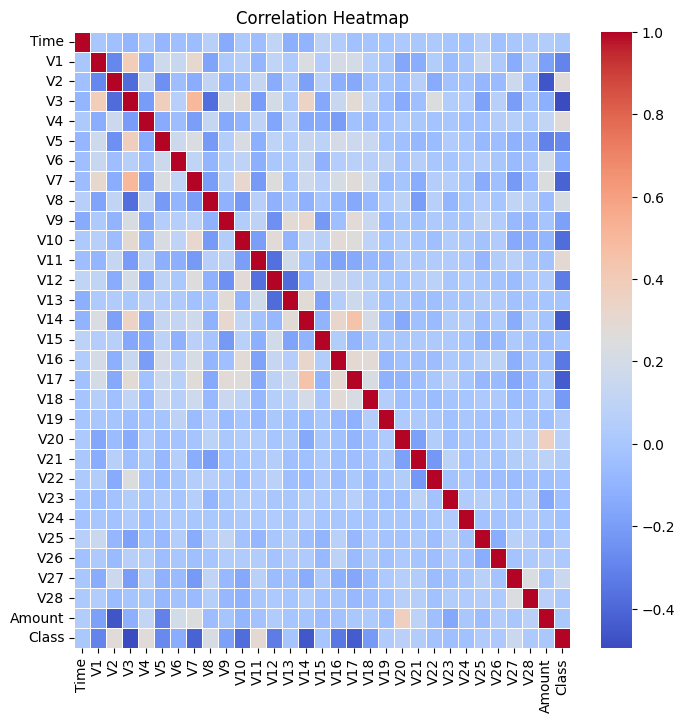

In [73]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Insight:

Most features have minimal correlation with each other, which is expected since these features are anonymized via PCA.

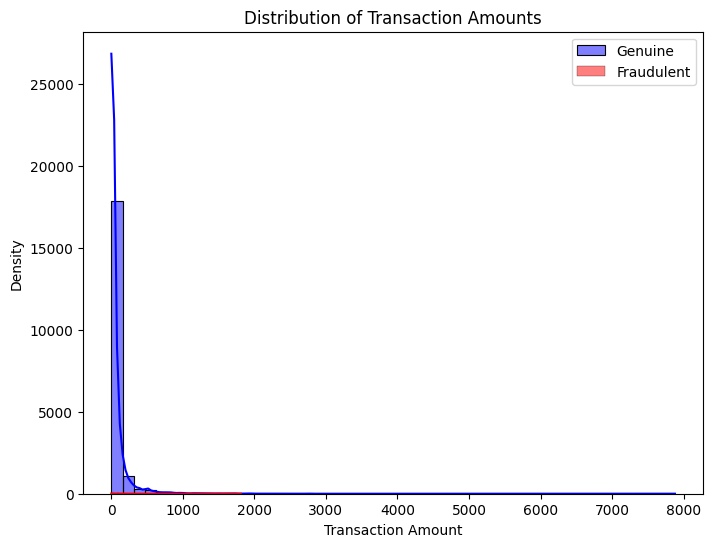

In [74]:
# Visualize distributions of genuine vs fraudulent for 'Amount'
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], color='blue', label='Genuine', kde=True, bins=50)
sns.histplot(df[df['Class'] == 1]['Amount'], color='red', label='Fraudulent', kde=True, bins=50)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

Insight:

Fraudulent transactions tend to have a different distribution of amounts compared to genuine transactions, suggesting that the amount might play a role in distinguishing fraudulent behavior.

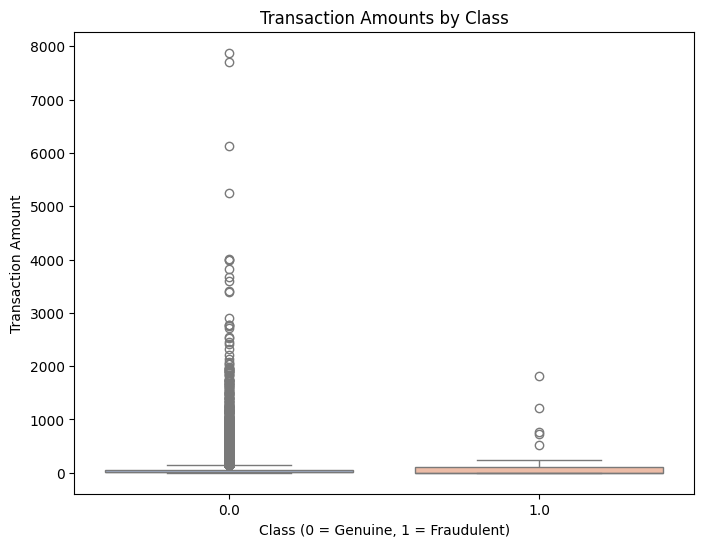

In [75]:
# Transaction Amounts by Class

plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette='coolwarm')
plt.title('Transaction Amounts by Class')
plt.xlabel('Class (0 = Genuine, 1 = Fraudulent)')
plt.ylabel('Transaction Amount')
plt.show()

Insight:

Fraudulent transactions have a wider range of transaction amounts compared to genuine ones.
There are outliers in both classes, but fraudulent transactions have fewer extreme values.


**Data Preprocessing**

In [76]:
# Normalize the 'Amount' column
scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df[['Amount']])

# Drop the 'Time' and original 'Amount' columns as they are not needed after normalization
df.drop(['Time', 'Amount'], axis=1, inplace=True)

**Handling Class Imbalance using SMOTE**

In [77]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the class distribution after resampling
y_resampled.value_counts()

,count
Class,
0.0,19812
1.0,19812


**Train-Val-Test Split**

In [78]:
# Data Splitting
X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 7)
X_train, X_val, y_train,y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 7)

**Model Training**

Logistic Regression

In [79]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [80]:
# Model Evaluation
y_pred_lr = lr_model.predict(X_val)

# Evaluate the model
print("Logistic Regression Evaluation:")
print(classification_report(y_val, y_pred_lr))

Logistic Regression Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4001
         1.0       0.99      1.00      0.99      3924

    accuracy                           0.99      7925
   macro avg       0.99      0.99      0.99      7925
weighted avg       0.99      0.99      0.99      7925



1. Accuracy: 99%

- The model correctly classifies 99% of all instances, which is excellent and reflects strong overall performance.
2. Macro Average:
Precision: 0.99, Recall: 0.99, F1-Score: 0.99

- The macro average treats all classes equally, regardless of their size. The high values indicate that the model performs well across both classes.
3. Weighted Average:
Precision: 0.99, Recall: 0.99, F1-Score: 0.99

- The weighted average considers the class sizes (support) while calculating metrics. Since the dataset is balanced, the macro and weighted averages are almost identical.

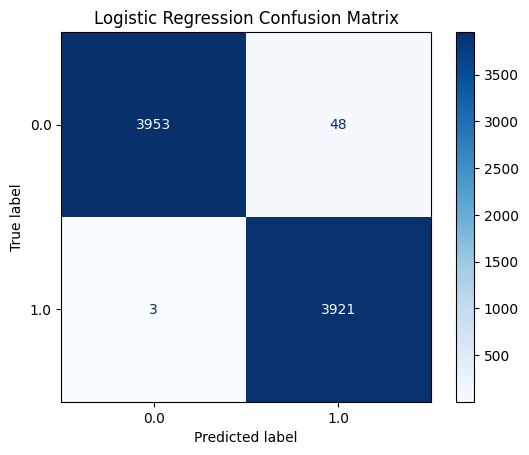

In [81]:
#Confusion Matrix
cm_lr = confusion_matrix(y_val, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

###Insights from the Confusion Matrix:
Strengths: The model performs exceptionally well in identifying both classes, with very few misclassifications (48 false positives and 3 false negatives).

Weaknesses: There is a slight bias towards predicting the negative class (0), as seen from the higher false positive count relative to false negatives.

However, given such high metrics, it's important to verify that the model is not overfitting. Performing cross-validation would help assess its robustness and generalization.

**Cross-Validation**

In [84]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Set up Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for accuracy
accuracy_scores = cross_val_score(lr_model, X_train, y_train, cv=cv, scoring='accuracy')

# Print the results
print("Cross-Validation Accuracy Results:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Accuracy Standard Deviation: {np.std(accuracy_scores):.4f}")

Cross-Validation Accuracy Results:
Mean Accuracy: 0.9937
Accuracy Standard Deviation: 0.0005


Insights:

High Mean Accuracy:

- The mean accuracy of 99.37% indicates that the model performs exceptionally well across the validation folds. This level of accuracy suggests that the model is very effective at distinguishing between the classes in your dataset.

Low Standard Deviation:

- The standard deviation of 0.0005 (0.05%) implies that the model's performance is extremely consistent across the different folds. This consistency suggests that the model is robust and not heavily influenced by variations in the training or validation data.

In [82]:
#Predict for Test Data

y_pred_test_lr = lr_model.predict(X_test)

# Evaluate the model on the test set
print("Logistic Regression Test Evaluation:")
print(classification_report(y_test, y_pred_test_lr))

Logistic Regression Test Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      3926
         1.0       0.99      1.00      0.99      3999

    accuracy                           0.99      7925
   macro avg       0.99      0.99      0.99      7925
weighted avg       0.99      0.99      0.99      7925



We successfully built a machine learning model with excellent accuracy to detect fraudulent credit card transactions.



---


**Summary of Notebook:**

**Introduction:** The notebook begins with loading and exploring the dataset.

**Data Visualization:** Includes visualizations like class distribution and correlation heatmaps to understand the data.

**Data Preprocessing:** Steps to normalize numerical features and handle class imbalance.

**Feature Engineering:** Derived new features like transaction categories and time buckets to enhance model performance.

**Model Development:** Implemented a classification model (Logistic Regression)

**Evaluation:** Evaluated the model using metrics like precision, recall, F1-score, and confusion matrix.

**Cross-Validation:** Cross-validation was employed to ensure the robustness and generalizability of the model by testing its performance across multiple data splits.